<h1 style = "color: green"> Esercitazione 11 </h1>

<h3 style = "color: blue"> Esercizio 11.1 </h3>

La rete neurale più semplice è composta da un solo strato (layer) composto da un solo neurone, senza funzione di attivazione. Questa rete è in grado di effettuare un fit lineare dei dati, infatti l'equazione di una retta, $y=mx+q$, è identica al risultato della rete, se $x$ sono i dati di input, $y$ quelli di output, $q$ è il bias e $m$ è il peso dell'unico collegamento.  
Studiamo quindi questa semplice rete, cercando di effettuare un fit della retta
$$f(x)=2x+1$$
e analizziamo come varia il risultato cambiando: il numero di epoche dell'apprendimento $N_{epochs}$, il numero di dati su cui allenare la rete $N_{train}$ e il rumore dei dati $\sigma$.

Cominciamo studiando la rete con i valori forniti in partenza, riportati nel secondo specchietto.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [7]:
Ntrain = 500
Nepochs = 30
sigma = 0.0 # noise standard deviation

In [8]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

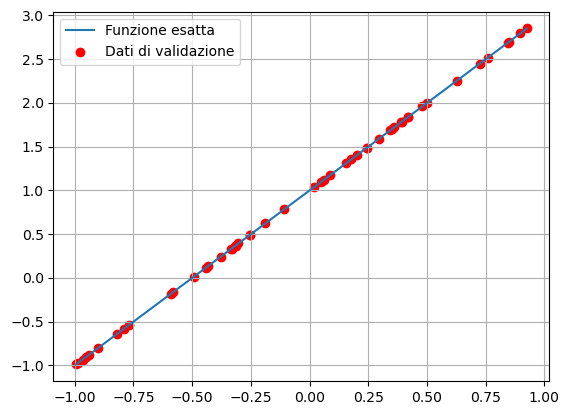

In [9]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='Funzione esatta')
plt.scatter(x_valid, y_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [11]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 18ms/step - loss: 1.5480 - mse: 1.5480 - val_loss: 1.0925 - val_mse: 1.0925
Epoch 2/30
16/16 [==============================] - 0s 4ms/step - loss: 1.0421 - mse: 1.0421 - val_loss: 0.7499 - val_mse: 0.7499
Epoch 3/30
16/16 [==============================] - 0s 4ms/step - loss: 0.7294 - mse: 0.7294 - val_loss: 0.5382 - val_mse: 0.5382
Epoch 4/30
16/16 [==============================] - 0s 4ms/step - loss: 0.5305 - mse: 0.5305 - val_loss: 0.4003 - val_mse: 0.4003
Epoch 5/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3975 - mse: 0.3975 - val_loss: 0.3055 - val_mse: 0.3055
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 0.3044 - mse: 0.3044 - val_loss: 0.2376 - val_mse: 0.2376
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 0.2367 - mse: 0.2367 - val_loss: 0.1871 - val_mse: 0.1871
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 0.1861 - mse: 0.1

In [13]:
# return weights and biases
params = model.get_weights()
weight = params[0][0]
bias = params[1][0]
print(params)

[array([[1.9383931]], dtype=float32), array([0.9993226], dtype=float32)]


In [14]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0012 - mse: 0.0012

Test loss: 0.001206801040098071
Test accuracy: 0.001206801040098071


In [15]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0012 - mse: 0.0012

Test loss: 0.001206801040098071
Test accuracy: 0.001206801040098071


4/4 [==============================] - 0s 2ms/step


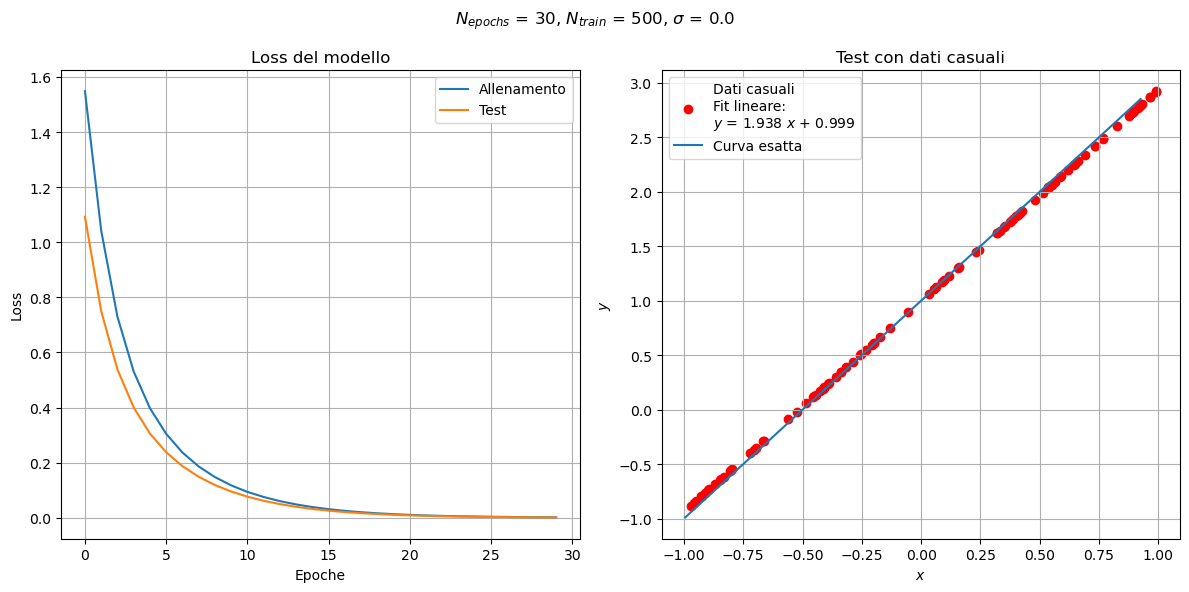

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali\n" + "Fit lineare:\n" + "$y$ = %.3f $x$ + %.3f" % (weight, bias))
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("$N_{epochs}$ = %i, $N_{train}$ = %i, $\sigma$ = %.1f" % (Nepochs, Ntrain, sigma))
fig.tight_layout()
plt.show()

<h4> Rumore dei dati </h4>

Il caso precedente effettua un buon fit dei dati, che però sono generati già sulla retta. Proviamo ora ad aumentare il rumore dei dati (la deviazione standard), in modo da verificare di poter effettivamente fittare dei dati reali. I parametri sono riportati nel primo specchietto (come in tutti i casi seguenti).

In [17]:
Ntrain = 500
Nepochs = 30
sigma = 1.0

In [18]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

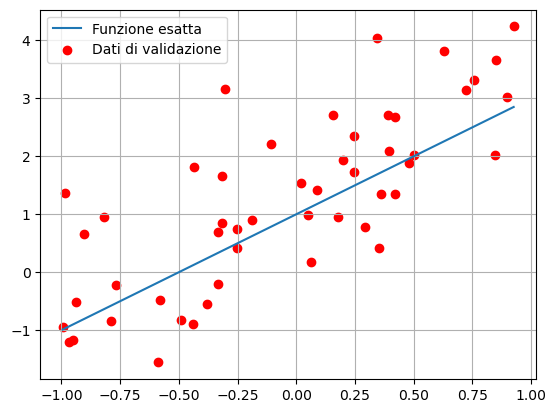

In [19]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='Funzione esatta')
plt.scatter(x_valid, y_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [21]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 1s 23ms/step - loss: 5.0173 - mse: 5.0173 - val_loss: 4.5824 - val_mse: 4.5824
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 4.0718 - mse: 4.0718 - val_loss: 3.7373 - val_mse: 3.7373
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 3.3768 - mse: 3.3768 - val_loss: 3.1358 - val_mse: 3.1358
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 2.8666 - mse: 2.8666 - val_loss: 2.6808 - val_mse: 2.6808
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 2.4729 - mse: 2.4729 - val_loss: 2.3290 - val_mse: 2.3290
Epoch 6/30
16/16 [==============================] - 0s 4ms/step - loss: 2.1655 - mse: 2.1655 - val_loss: 2.0674 - val_mse: 2.0674
Epoch 7/30
16/16 [==============================] - 0s 4ms/step - loss: 1.9283 - mse: 1.9283 - val_loss: 1.8567 - val_mse: 1.8567
Epoch 8/30
16/16 [==============================] - 0s 4ms/step - loss: 1.7374 - mse: 1.7

In [22]:
# return weights and biases
params = model.get_weights()
weight = params[0][0]
bias = params[1][0]
print(params)

[array([[1.9775776]], dtype=float32), array([0.8950263], dtype=float32)]


In [23]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 1.1079 - mse: 1.1079

Test loss: 1.1079026460647583
Test accuracy: 1.1079026460647583


In [24]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0109 - mse: 0.0109

Test loss: 0.010933415964245796
Test accuracy: 0.010933415964245796


4/4 [==============================] - 0s 2ms/step


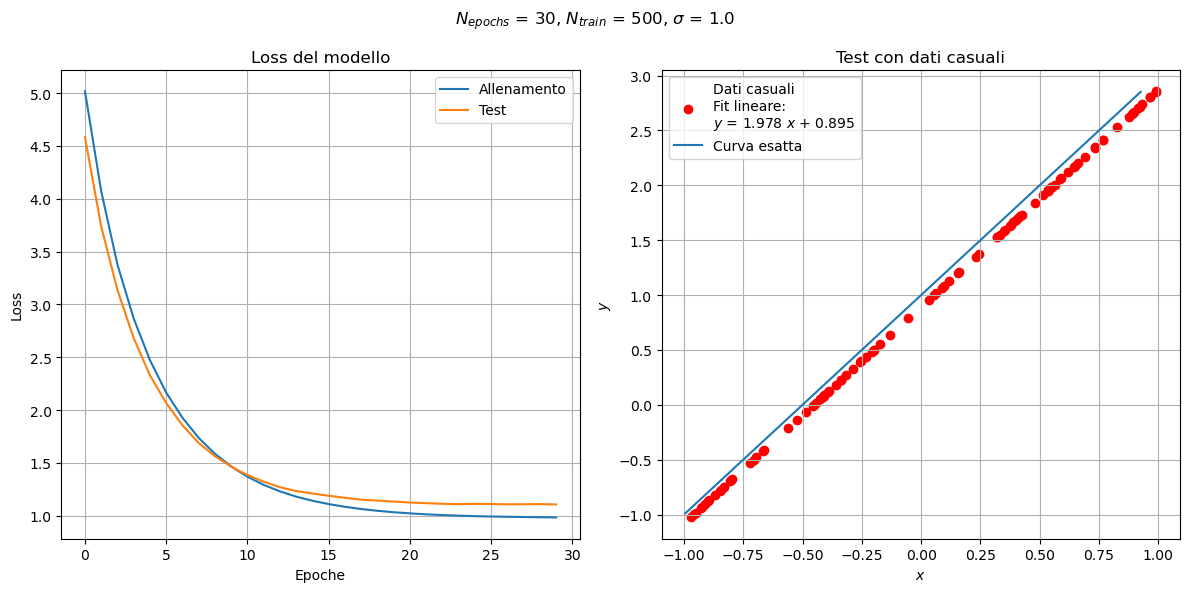

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali\n" + "Fit lineare:\n" + "$y$ = %.3f $x$ + %.3f" % (weight, bias))
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("$N_{epochs}$ = %i, $N_{train}$ = %i, $\sigma$ = %.1f" % (Nepochs, Ntrain, sigma))
fig.tight_layout()
plt.show()

Fino a circa $\sigma=0.5$ questa rete riesce a fittare bene i dati di test (non riportiamo questi casi perché poco interessanti).  
Con $\sigma=1$ elevata (pari all'intercetta) questo modello non riesce ad effettuare un fit adeguato, come dimostra anche il valore elevato della funzione loss. Il problema sembra essere più il valore dell'intercetta che la pendenza. Proviamo quindi ad aumentare il numero di dati con cui alleniamo la rete.

<h4> Numero di dati di allenamento </h4>

Non riportiamo più i grafici con i dati di validazione perché analoghi ai due casi precedenti.

In [26]:
Ntrain = 5000
Nepochs = 30
sigma = 1.0

In [27]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [28]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [29]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 1s 3ms/step - loss: 3.0124 - mse: 3.0124 - val_loss: 1.4109 - val_mse: 1.4109
Epoch 2/30
157/157 [==============================] - 0s 2ms/step - loss: 1.2048 - mse: 1.2048 - val_loss: 1.1410 - val_mse: 1.1410
Epoch 3/30
157/157 [==============================] - 0s 2ms/step - loss: 1.0022 - mse: 1.0022 - val_loss: 1.1341 - val_mse: 1.1341
Epoch 4/30
157/157 [==============================] - 0s 2ms/step - loss: 0.9795 - mse: 0.9795 - val_loss: 1.1568 - val_mse: 1.1568
Epoch 5/30
157/157 [==============================] - 0s 2ms/step - loss: 0.9767 - mse: 0.9767 - val_loss: 1.1607 - val_mse: 1.1607
Epoch 6/30
157/157 [==============================] - 0s 2ms/step - loss: 0.9763 - mse: 0.9763 - val_loss: 1.1511 - val_mse: 1.1511
Epoch 7/30
157/157 [==============================] - 0s 2ms/step - loss: 0.9763 - mse: 0.9763 - val_loss: 1.1599 - val_mse: 1.1599
Epoch 8/30
157/157 [==============================] - 0s 2ms/step - loss: 0.

In [30]:
# return weights and biases
params = model.get_weights()
weight = params[0][0]
bias = params[1][0]
print(params)

[array([[2.009715]], dtype=float32), array([1.0092633], dtype=float32)]


In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 1.1722 - mse: 1.1722

Test loss: 1.172221064567566
Test accuracy: 1.172221064567566


In [32]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 8.4818e-05 - mse: 8.4818e-05

Test loss: 8.481780241709203e-05
Test accuracy: 8.481780241709203e-05


4/4 [==============================] - 0s 2ms/step


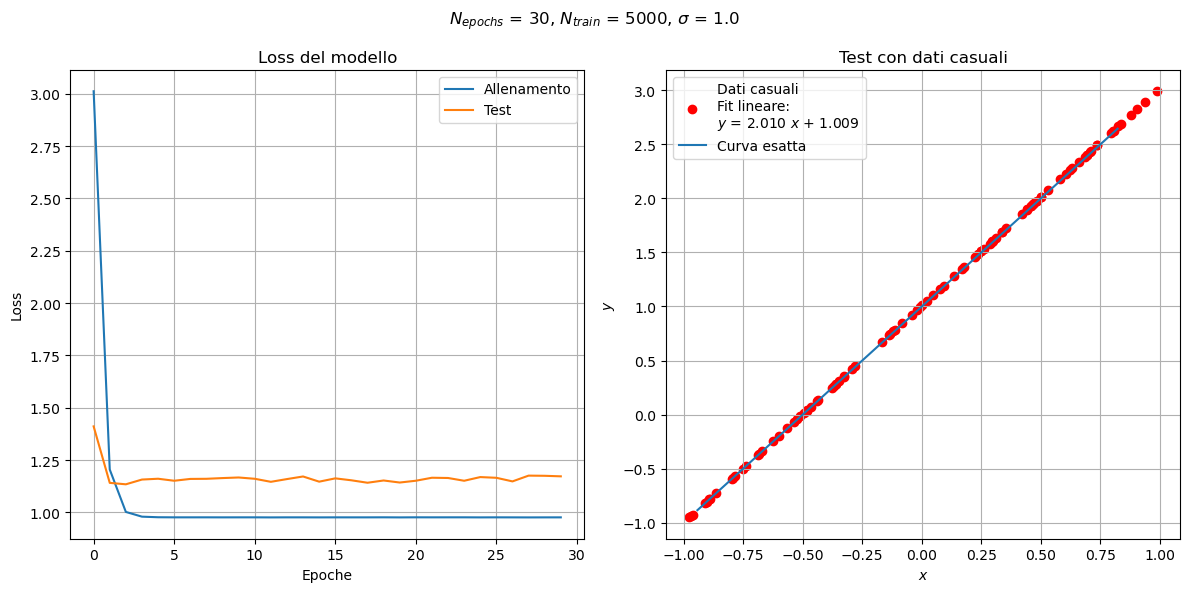

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali\n" + "Fit lineare:\n" + "$y$ = %.3f $x$ + %.3f" % (weight, bias))
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("$N_{epochs}$ = %i, $N_{train}$ = %i, $\sigma$ = %.1f" % (Nepochs, Ntrain, sigma))
fig.tight_layout()
plt.show()

Aumentando quindi il numero di dati di allenamento, il risultato della rete migliora.  

Possiamo verificare anche il contrario, diminuendo il numero di dati e ripetendo il primo esempio con $\sigma=0$.

In [34]:
Ntrain = 50
Nepochs = 30
sigma = 0.0

In [35]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, Ntrain)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

In [36]:
# compose the NN model
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [37]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=Nepochs,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
2/2 [==============================] - 1s 251ms/step - loss: 1.4367 - mse: 1.4367 - val_loss: 0.9273 - val_mse: 0.9273
Epoch 2/30
2/2 [==============================] - 0s 39ms/step - loss: 1.3391 - mse: 1.3391 - val_loss: 0.8614 - val_mse: 0.8614
Epoch 3/30
2/2 [==============================] - 0s 43ms/step - loss: 1.2471 - mse: 1.2471 - val_loss: 0.7972 - val_mse: 0.7972
Epoch 4/30
2/2 [==============================] - 0s 41ms/step - loss: 1.1590 - mse: 1.1590 - val_loss: 0.7396 - val_mse: 0.7396
Epoch 5/30
2/2 [==============================] - 0s 37ms/step - loss: 1.0791 - mse: 1.0791 - val_loss: 0.6870 - val_mse: 0.6870
Epoch 6/30
2/2 [==============================] - 0s 37ms/step - loss: 1.0061 - mse: 1.0061 - val_loss: 0.6396 - val_mse: 0.6396
Epoch 7/30
2/2 [==============================] - 0s 39ms/step - loss: 0.9392 - mse: 0.9392 - val_loss: 0.5959 - val_mse: 0.5959
Epoch 8/30
2/2 [==============================] - 0s 43ms/step - loss: 0.8769 - mse: 0.8769 - va

In [38]:
# return weights and biases
params = model.get_weights()
weight = params[0][0]
bias = params[1][0]
print(params)

[array([[1.3417915]], dtype=float32), array([0.7423555], dtype=float32)]


In [39]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1634 - mse: 0.1634

Test loss: 0.1634024679660797
Test accuracy: 0.1634024679660797


In [40]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 4ms/step - loss: 0.1634 - mse: 0.1634

Test loss: 0.1634024679660797
Test accuracy: 0.1634024679660797


4/4 [==============================] - 0s 2ms/step


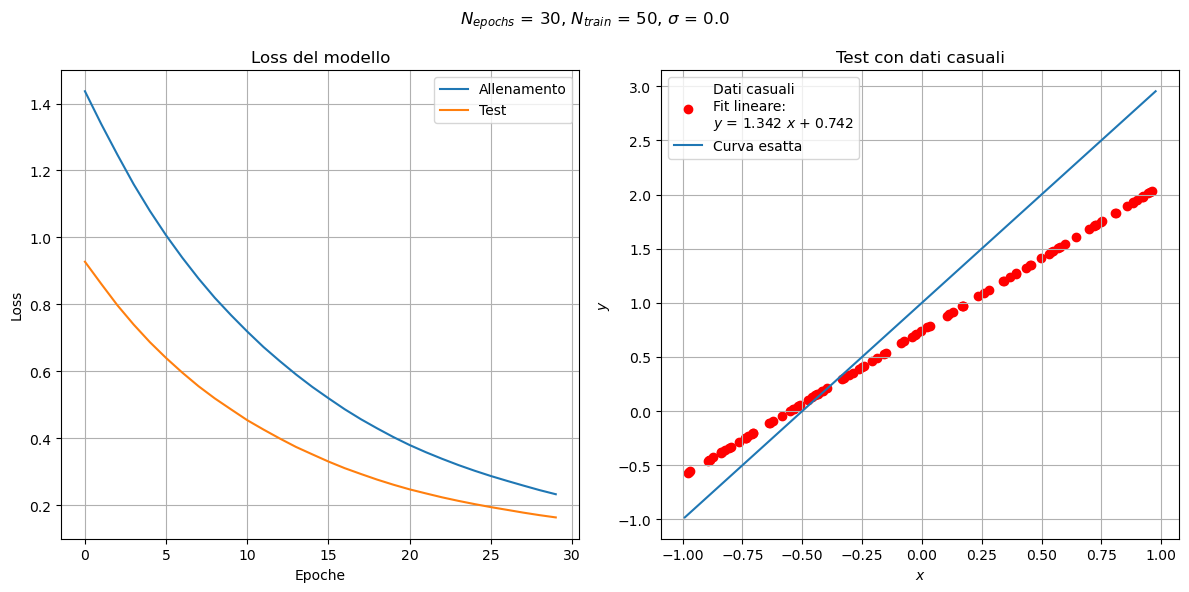

In [41]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali\n" + "Fit lineare:\n" + "$y$ = %.3f $x$ + %.3f" % (weight, bias))
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("$N_{epochs}$ = %i, $N_{train}$ = %i, $\sigma$ = %.1f" % (Nepochs, Ntrain, sigma))
fig.tight_layout()
plt.show()

Come ci aspettavamo, con un numero di dati così piccolo la rete non ha la possibilità di imparare e il fit è sbagliato.

<h4> Numero di epoche </h4>

Ci aspettiamo un comportamento simile ai due casi precedenti cambiando il numero di epoche invece di quello dei dati di allenamento. Ripetiamo quindi la stessa analisi.  

In realtà troviamo che raddoppiando il numero di epoche ($N_{epochs}=60$), con $N_{train}=500$ e $\sigma=1.0$ il fit non migliora, questo perché stiamo allenando la rete sempre sugli stessi dati, il doppio delle volte. Probabilmente l'apprendimento era già ottimizzato. Per verificare che il fit migliora, servirebbe una rete più complicata con più dati di allenamento. 

Invece, con sole $N_{epochs}=10$ epoche, la rete non riesce a ottimizzare i suoi parametri e il fit risulta peggiore.  

Questi due casi non sono riportati.

<h3 style = "color: blue"> Esercizio 11.2 </h3>

Creiamo ora una rete più complessa, per provare a fittare il polinomio
$$f(x)=4-3x-2x^2+3x^3$$
nell'intervallo $x \in [-1,1]$.  
Fissiamo $N_{train}=5000$, $N_{epochs}=30$, $\sigma = 0.5$ per confrontare diverse reti neurali.  

Riportiamo prima la migliore rete trovata, con anche un grafico per mostrare come si comporta con dati generati fuori dall'intervallo di allenamento. Come funzione loss usiamo "logcosh" perché è meno sensibile ai dati generati molto lontano dal valore esatto, abbastanza frequenti con $\sigma =0.5$.

In [42]:
# target parameters of f(x) = a*x^3 + b*x^2 + c*x + d
a = 3.
b = -2.
c = -3.
d = 4.


nEpochs = 30

In [43]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort() # sort for the next plot
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) function

sigma = 0.5
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma)
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

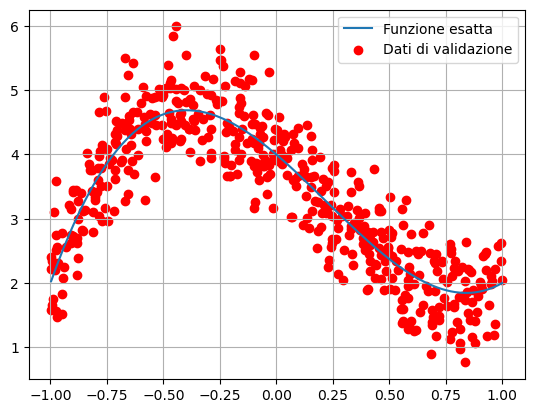

In [44]:
# plot validation and target dataset
plt.plot(x_valid, y_target, label='Funzione esatta')
plt.scatter(x_valid, y_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(1,), activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 40)                80        
                                                                 
 dense_5 (Dense)             (None, 20)                820       
                                                                 
 dense_6 (Dense)             (None, 10)                210       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [46]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nEpochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 0.7575 - mse: 2.7716 - val_loss: 0.2465 - val_mse: 0.6208
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2071 - mse: 0.5081 - val_loss: 0.1779 - val_mse: 0.4251
Epoch 3/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1382 - mse: 0.3160 - val_loss: 0.1203 - val_mse: 0.2657
Epoch 4/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1173 - mse: 0.2608 - val_loss: 0.1125 - val_mse: 0.2469
Epoch 5/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1139 - mse: 0.2525 - val_loss: 0.1122 - val_mse: 0.2467
Epoch 6/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1140 - mse: 0.2528 - val_loss: 0.1120 - val_mse: 0.2465
Epoch 7/30
157/157 [==============================] - 1s 3ms/step - loss: 0.1140 - mse: 0.2526 - val_loss: 0.1111 - val_mse: 0.2439
Epoch 8/30
157/157 [==============================] - 1s 3ms/step - loss: 0.

In [47]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.1103 - mse: 0.2420

Test loss: 0.11028395593166351
Test accuracy: 0.24197320640087128


In [48]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.0017 - mse: 0.0033

Test loss: 0.0016642416594550014
Test accuracy: 0.003337584203109145


7/7 [==============================] - 0s 2ms/step


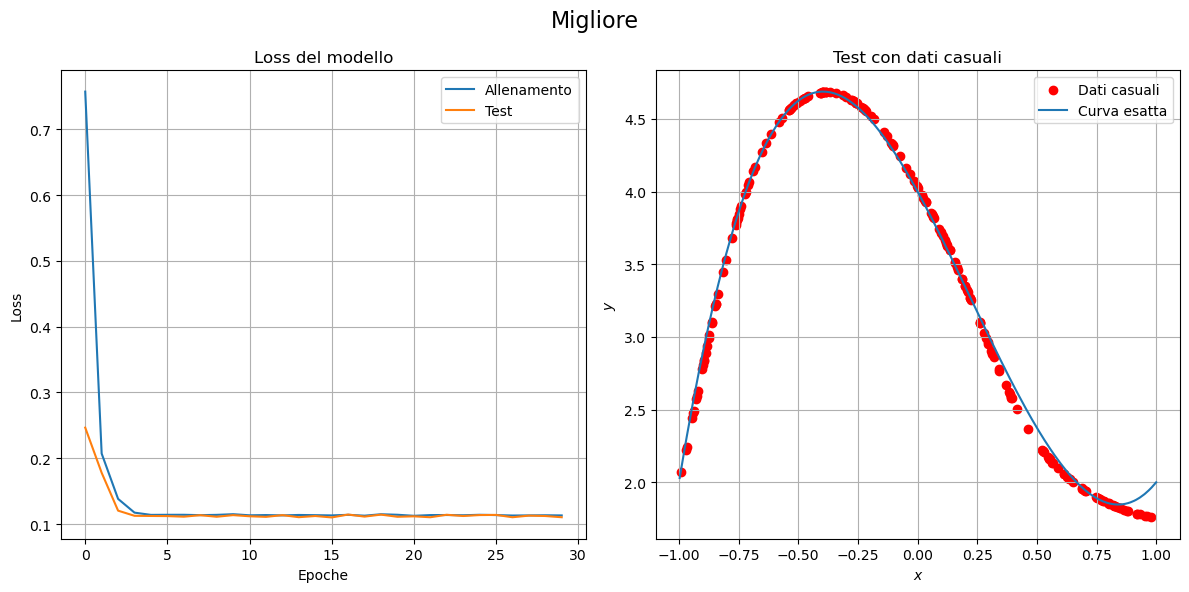

In [49]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali")
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Migliore", fontsize = 16)
fig.tight_layout()
plt.show()

7/7 [==============================] - 0s 2ms/step


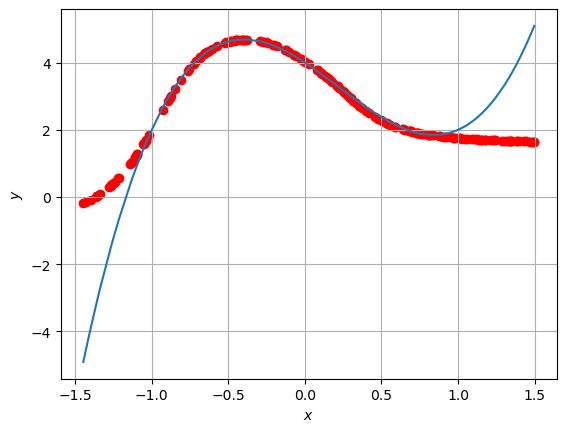

In [50]:
# see how the model behaves outside the training range
x_new = np.random.uniform(-1.5, 1.5, 200)
x_new.sort()
y_new = model.predict(x_new)
plt.scatter(x_new, y_new, color='r')
plt.plot(x_new, a * x_new**3 + b * x_new**2 + c * x_new + d)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.grid(True)
plt.show()

Considerando che la deviazione standard $\sigma$ è piuttosto elevata, il risultato è buono. Ponendo $\sigma=0$ si può vedere come il risultato (non riportato) segue molto bene la curva esatta anche nella coda di destra dove invece tutti i modelli falliscono in presenza di rumore.  
Fuori dall'intervallo su cui è stato addestrato, il modello invece fallisce, come del resto ci aspettavamo. La rete infatti non costruisce una funzione analitica valida ovunque, ma solo la miglior funzione che approssima i dati su cui viene addestrata.

Di seguito proviamo a dimezzare il numero di neuroni in tutti gli strati e a rimuovere il penultimo.

In [51]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(1,), activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 20)                40        
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
 dense_12 (Dense)            (None, 1)                 6         
                                                                 
Total params: 311
Trainable params: 311
Non-trainable params: 0
_________________________________________________________________


In [52]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nEpochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 1.3323 - mse: 5.2912 - val_loss: 0.3803 - val_mse: 0.9919
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2945 - mse: 0.7309 - val_loss: 0.2700 - val_mse: 0.6660
Epoch 3/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2534 - mse: 0.6233 - val_loss: 0.2490 - val_mse: 0.6186
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2341 - mse: 0.5804 - val_loss: 0.2302 - val_mse: 0.5785
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2144 - mse: 0.5356 - val_loss: 0.2119 - val_mse: 0.5290
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1854 - mse: 0.4473 - val_loss: 0.1693 - val_mse: 0.3966
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1464 - mse: 0.3359 - val_loss: 0.1336 - val_mse: 0.2993
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.

In [53]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.1106 - mse: 0.2426

Test loss: 0.11063209176063538
Test accuracy: 0.24257799983024597


In [54]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0033

Test loss: 0.0016446624649688601
Test accuracy: 0.003299389500170946


7/7 [==============================] - 0s 3ms/step


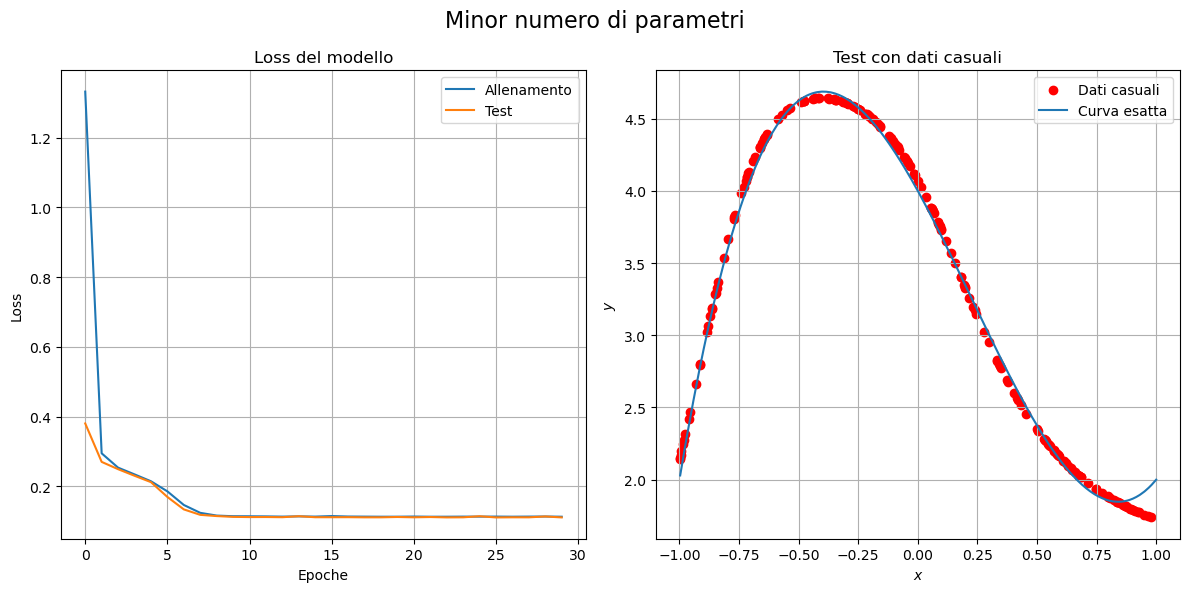

In [55]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali")
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Minor numero di parametri", fontsize = 16)
fig.tight_layout()
plt.show()

Il risultato così ottenuto non è troppo peggiore di quello precedente, considerando che abbiamo usato circa $1/4$ dei parametri.

Se proviamo ora a cambiare l'algoritmo di ottimizzazione, usando il più semplice stochastic gradient descent (SGD) invece di "adam", troviamo che, con questi parametri, in presenza di rumore non c'è molta differenza, mentre con $\sigma=0$ SGD non riesce a riprodurre la coda di destra della curva, al contrario di "adam" (non riportiamo il risultato).

Ora, invece di "logcosh", usiamo come funzione loss l'errore quadratico medio (mean squared error, MSE). Come vedremo, il risultato sarà simile, quindi ne approfittiamo anche per cambiare la funzione di attivazione, usando una "elu" invece che una tangente iperbolica.

In [56]:
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(1,), activation='elu'))
model.add(Dense(20, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(10, activation='elu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 40)                80        
                                                                 
 dense_14 (Dense)            (None, 20)                820       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [57]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nEpochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 1s 5ms/step - loss: 2.8691 - mse: 2.8691 - val_loss: 0.6563 - val_mse: 0.6563
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.5022 - mse: 0.5022 - val_loss: 0.4099 - val_mse: 0.4099
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 0.3295 - mse: 0.3295 - val_loss: 0.2903 - val_mse: 0.2903
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2747 - mse: 0.2747 - val_loss: 0.2737 - val_mse: 0.2737
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2683 - mse: 0.2683 - val_loss: 0.2538 - val_mse: 0.2538
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2625 - mse: 0.2625 - val_loss: 0.2533 - val_mse: 0.2533
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.2610 - mse: 0.2610 - val_loss: 0.2861 - val_mse: 0.2861
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.

In [58]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.2456 - mse: 0.2456

Test loss: 0.24559979140758514
Test accuracy: 0.24559979140758514


In [59]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0044 - mse: 0.0044

Test loss: 0.004442615434527397
Test accuracy: 0.004442615434527397


7/7 [==============================] - 0s 3ms/step


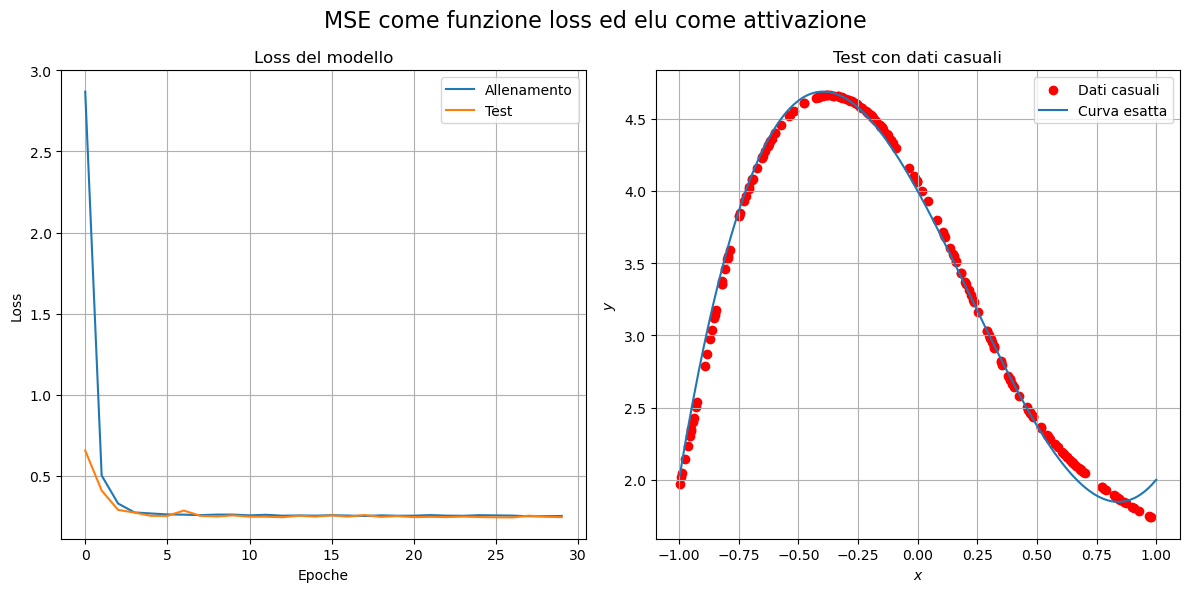

In [60]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali")
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("MSE come funzione loss ed elu come attivazione", fontsize = 16)
fig.tight_layout()
plt.show()

Il risultato della loss è peggiore, anche se il grafico è simile, perché la rete cerca di fittare con maggior peso anche i dati di allenamento generati molto lontano dalla curva esatta, infatti la loss è circa il doppio dei due casi precedenti.  
Inoltre concludiamo che anche la "elu" (exponential linear unit) è una buona funzione di attivazione in questo caso.

Infine, usiamo delle funzioni di attivazione diverse. Per prima proviamo la "relu". La differenza con la "elu" è che, per valori minori di $0$, restituisce sempre $0$.

In [61]:
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(1,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 40)                80        
                                                                 
 dense_19 (Dense)            (None, 20)                820       
                                                                 
 dense_20 (Dense)            (None, 10)                210       
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [62]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nEpochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 1.2246 - mse: 4.9747 - val_loss: 0.3153 - val_mse: 0.8827
Epoch 2/30
157/157 [==============================] - 1s 3ms/step - loss: 0.2058 - mse: 0.5162 - val_loss: 0.1512 - val_mse: 0.3485
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1300 - mse: 0.2938 - val_loss: 0.1206 - val_mse: 0.2670
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1193 - mse: 0.2655 - val_loss: 0.1154 - val_mse: 0.2539
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1158 - mse: 0.2572 - val_loss: 0.1121 - val_mse: 0.2458
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.2542 - val_loss: 0.1122 - val_mse: 0.2461
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.1153 - mse: 0.2562 - val_loss: 0.1116 - val_mse: 0.2451
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.

In [63]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.2477

Test loss: 0.11252244561910629
Test accuracy: 0.2477446049451828


In [64]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.0049 - mse: 0.0098

Test loss: 0.004892596043646336
Test accuracy: 0.009840603917837143


7/7 [==============================] - 0s 3ms/step


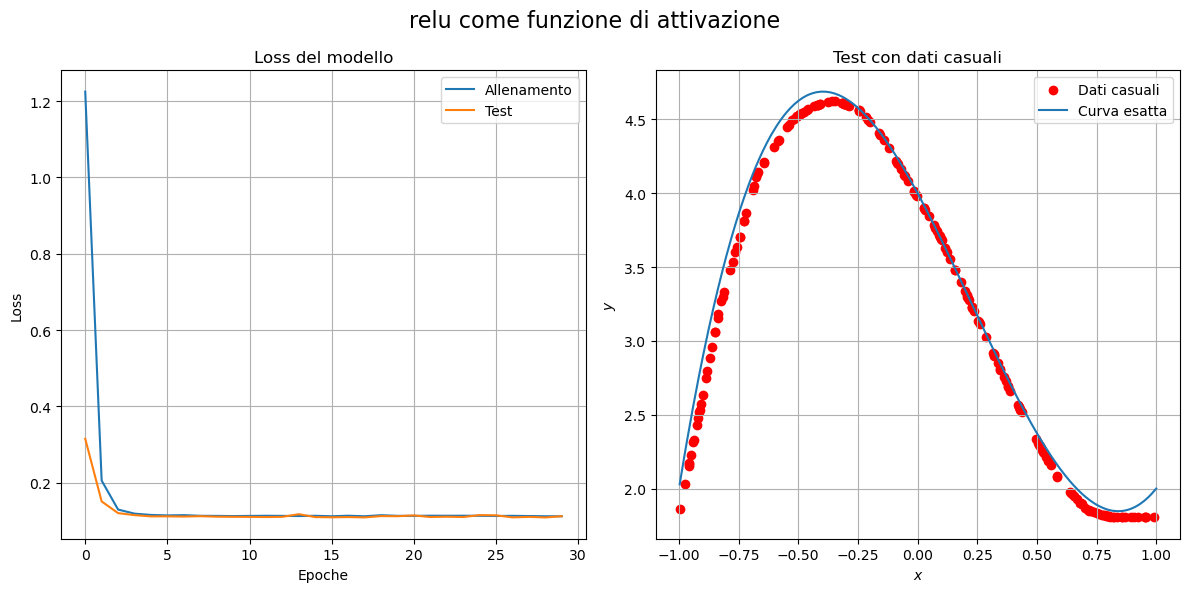

In [65]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali")
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("relu come funzione di attivazione", fontsize = 16)
fig.tight_layout()
plt.show()

Non restituendo valori negativi, il grafico con la "relu" risulta come diviso in tratti rettilinei.  
Proviamo ora con una sigmoide: anch'essa non ritorna mai valori negativi ed è superiormente limitata, come la tangente iperbolica.

In [66]:
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(1,), activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40)                80        
                                                                 
 dense_24 (Dense)            (None, 20)                820       
                                                                 
 dense_25 (Dense)            (None, 10)                210       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [67]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=nEpochs,
          shuffle=True,
          validation_data=(x_valid, y_valid))

Epoch 1/30
157/157 [==============================] - 2s 5ms/step - loss: 2.2028 - mse: 9.7920 - val_loss: 1.3216 - val_mse: 4.8588
Epoch 2/30
157/157 [==============================] - 0s 3ms/step - loss: 0.8815 - mse: 2.8771 - val_loss: 0.6048 - val_mse: 1.7319
Epoch 3/30
157/157 [==============================] - 0s 3ms/step - loss: 0.5413 - mse: 1.4703 - val_loss: 0.5028 - val_mse: 1.3373
Epoch 4/30
157/157 [==============================] - 0s 3ms/step - loss: 0.4999 - mse: 1.3222 - val_loss: 0.4951 - val_mse: 1.3147
Epoch 5/30
157/157 [==============================] - 0s 3ms/step - loss: 0.4977 - mse: 1.3209 - val_loss: 0.4949 - val_mse: 1.3145
Epoch 6/30
157/157 [==============================] - 0s 3ms/step - loss: 0.4973 - mse: 1.3182 - val_loss: 0.4944 - val_mse: 1.3128
Epoch 7/30
157/157 [==============================] - 0s 3ms/step - loss: 0.4965 - mse: 1.3159 - val_loss: 0.4930 - val_mse: 1.3095
Epoch 8/30
157/157 [==============================] - 0s 3ms/step - loss: 0.

In [68]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.2060 - mse: 0.5179

Test loss: 0.20596884191036224
Test accuracy: 0.5178951025009155


In [69]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 2ms/step - loss: 0.1037 - mse: 0.2658

Test loss: 0.10366666316986084
Test accuracy: 0.26577627658843994


7/7 [==============================] - 0s 2ms/step


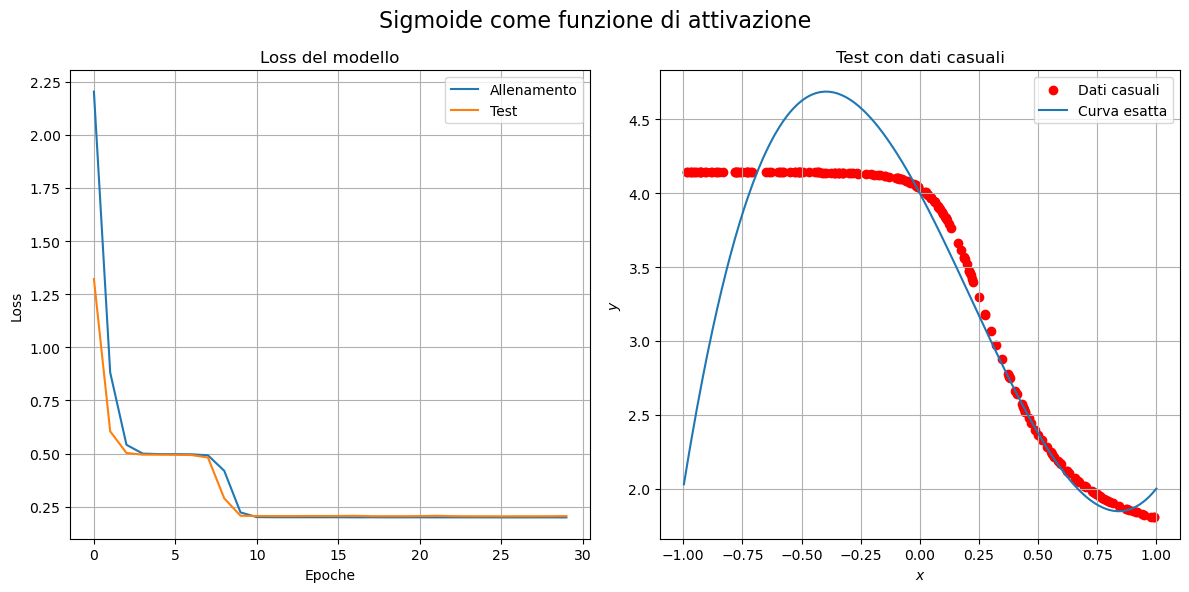

In [70]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

# look into training history
# Plot training & validation loss values
ax[0].plot(history.history['loss'])
ax[0].plot(history.history['val_loss'])
ax[0].set(title = 'Loss del modello', ylabel = 'Loss', xlabel = 'Epoche')
ax[0].legend(['Allenamento', 'Test'], loc='best')
ax[0].grid(True)


# fit new random data
x_predicted = np.random.uniform(-1, 1, 200)
y_predicted = model.predict(x_predicted)
ax[1].scatter(x_predicted, y_predicted, color='r', label = "Dati casuali")
ax[1].plot(x_valid, y_target, label = "Curva esatta")
ax[1].set(title = 'Test con dati casuali', xlabel = '$x$', ylabel = '$y$')
ax[1].grid(True)
ax[1].legend()

fig.suptitle("Sigmoide come funzione di attivazione", fontsize = 16)
fig.tight_layout()
plt.show()

In questo caso la previsione del modello risulta errata.

Concludiamo che, costruendo una rete neurale con le funzioni di attivazione e loss adatte, con un buon algoritmo di ottimizzazione, e allenandola con un numero adatto di dati, il numero di parametri può essere aumentato per migliorare la bontà del fit, ma a un certo punto i miglioramenti saranno trascurabili. Può anche capitare che la rete a un certo punto sia troppo adattata ai dati di allenamento ("overfitting") e che quindi il risultato peggiori aumentando i parametri.  
Infine, la coda di destra non è mai fittata bene, probabilmente perché, essendo un tratto piuttosto corto e "dettagliato" rispetto al tratto quasi rettilineo precedente, ci sono pochi dati in quella zona e la sua forma è "persa" a causa del rumore.

<h3 style = "color: blue"> Esercizio 11.3 </h3>

Proviamo ora a fittare una funzione in 2D:
$$f(x,y) = \sin(x^2+y^2)$$
nell'intervallo bidimensionale $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [89]:
# parameters
c_max = 1.5
c_min = -1.5
n_train = 10000
n_valid = 1000

# function to fit
def f(x, y):
    return np.sin(x*x + y*y)

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(c_min, c_max, n_train)
x_valid = np.random.uniform(c_min, c_max, n_valid)
y_train = np.random.uniform(c_min, c_max, n_train)
y_valid = np.random.uniform(c_min, c_max, n_valid)
r_valid = np.sqrt(x_valid * x_valid + y_valid * y_valid)

vec_train = np.column_stack((x_train, y_train))
vec_valid = np.column_stack((x_valid, y_valid))

z_target = f(x_valid, y_valid) # ideal (target) function

sigma = 0.25 # -1 < sin < 1, we use a smaller noise
z_train = np.random.normal(f(x_train, y_train), sigma)
z_valid = np.random.normal(f(x_valid, y_valid), sigma)

In [90]:
'''# plot validation and target dataset
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

x_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
ax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 25, cstride = 25)
ax.scatter(x_valid, y_valid, z_valid, color='r', label='Dati di validazione')
plt.legend()
plt.grid(True)
plt.show()'''

"# plot validation and target dataset\nfig = plt.figure(figsize = (10, 10))\nax = fig.add_subplot(projection='3d')\n\nx_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)\nx_grid, y_grid = np.meshgrid(x_grid, y_grid)\nax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 25, cstride = 25)\nax.scatter(x_valid, y_valid, z_valid, color='r', label='Dati di validazione')\nplt.legend()\nplt.grid(True)\nplt.show()"

In [91]:
model = tf.keras.Sequential()
model.add(Dense(40, input_shape=(2,), activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='adam', loss='logcosh', metrics=['mse'])

# get a summary of our composed model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 40)                120       
                                                                 
 dense_39 (Dense)            (None, 20)                820       
                                                                 
 dense_40 (Dense)            (None, 10)                210       
                                                                 
 dense_41 (Dense)            (None, 10)                110       
                                                                 
 dense_42 (Dense)            (None, 1)                 11        
                                                                 
Total params: 1,271
Trainable params: 1,271
Non-trainable params: 0
_________________________________________________________________


In [92]:
# fit the model using training dataset
# report training progress against validation data
history = model.fit(x=vec_train, y=z_train, 
          batch_size=32, epochs=30,
          shuffle=True,
          validation_data=(vec_valid, z_valid))

Epoch 1/30
313/313 [==============================] - 2s 5ms/step - loss: 0.1014 - mse: 0.2253 - val_loss: 0.0843 - val_mse: 0.1858
Epoch 2/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0840 - mse: 0.1850 - val_loss: 0.0806 - val_mse: 0.1769
Epoch 3/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0787 - mse: 0.1728 - val_loss: 0.0711 - val_mse: 0.1547
Epoch 4/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0621 - mse: 0.1343 - val_loss: 0.0547 - val_mse: 0.1178
Epoch 5/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0553 - mse: 0.1187 - val_loss: 0.0511 - val_mse: 0.1098
Epoch 6/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0515 - mse: 0.1099 - val_loss: 0.0483 - val_mse: 0.1029
Epoch 7/30
313/313 [==============================] - 1s 3ms/step - loss: 0.0478 - mse: 0.1011 - val_loss: 0.0449 - val_mse: 0.0945
Epoch 8/30
313/313 [==============================] - 1s 3ms/step - loss: 0.

In [93]:
# evaluate model
score = model.evaluate(vec_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0642

Test loss: 0.03115995228290558
Test accuracy: 0.06421637535095215


In [94]:
# evaluate model with the exact curve
score = model.evaluate(vec_valid, z_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0032

Test loss: 0.0015938975848257542
Test accuracy: 0.003194277873262763


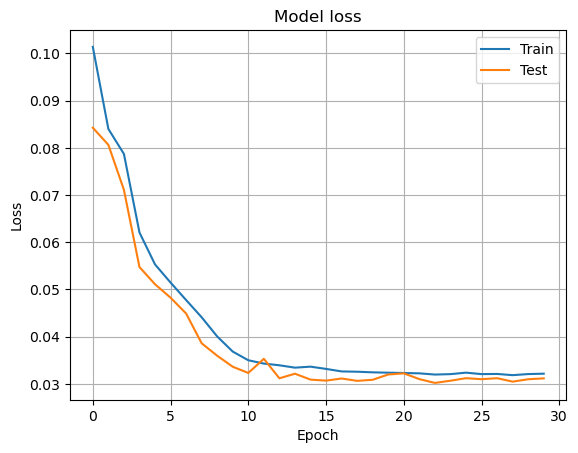

In [95]:
# look into training history
# plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

In [96]:
'''# fit new random data
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection='3d')

x_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
ax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 25, cstride = 25)

x_predicted = np.random.uniform(c_min, c_max, 100)
y_predicted = np.random.uniform(c_min, c_max, 100)
z_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))
ax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='Dati casuali')
plt.legend()
plt.grid(True)
plt.show()'''

"# fit new random data\nfig = plt.figure(figsize = (10, 10))\nax = fig.add_subplot(projection='3d')\n\nx_grid, y_grid = np.linspace(c_min, c_max, n_valid), np.linspace(c_min, c_max, n_valid)\nx_grid, y_grid = np.meshgrid(x_grid, y_grid)\nax.plot_wireframe(x_grid, y_grid, f(x_grid, y_grid), label='Funzione esatta', rstride = 25, cstride = 25)\n\nx_predicted = np.random.uniform(c_min, c_max, 100)\ny_predicted = np.random.uniform(c_min, c_max, 100)\nz_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))\nax.scatter(x_predicted, y_predicted, z_predicted, color='r', label='Dati casuali')\nplt.legend()\nplt.grid(True)\nplt.show()"

Da questo grafico sembra che la nostra rete riesca a fittare bene dei nuovi dati, ma possiamo vederlo meglio studiando il sistema in coordinate cilindriche, graficando quindi il risultato in funzione di $r=\sqrt{x^2+y^2}$.

16/16 [==============================] - 0s 3ms/step


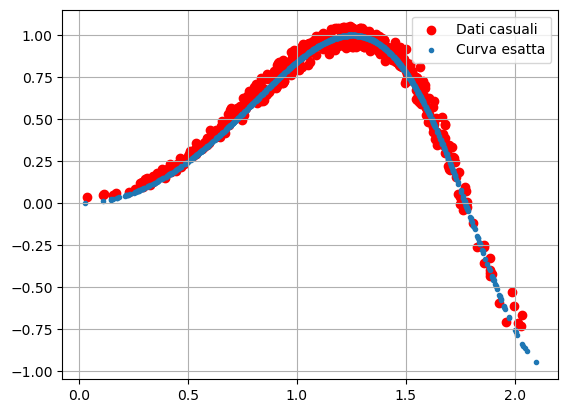

In [97]:
# fit new random data (using r instead of x and y)
x_predicted = np.random.uniform(c_min, c_max, 500)
y_predicted = np.random.uniform(c_min, c_max, 500)
z_predicted = model.predict(np.column_stack((x_predicted, y_predicted)))
r_predicted = np.sqrt(x_predicted * x_predicted + y_predicted * y_predicted)
plt.scatter(r_predicted, z_predicted, color='r', label='Dati casuali')
plt.scatter(r_valid, z_target, s = 9, label = 'Curva esatta')
plt.legend()
plt.grid(True)
plt.show()

Il nostro modello predice molto bene i risultati per $\sigma=0.25$. Anche per $\sigma=0.5$, seppur molto alta, i risultati seguono bene la curva esatta, però con una maggiore dispersione.